# 6.5: Unsupervised Machine Learning: Clustering

#### 01 Importing Libraries and Data
#### 02 Cleaning and Exploring the Data
#### 03 Data Preprocessing
#### 04 Principle Components Analysis (PCA)
#### 05 Combine PCA and K-means Clustering (Elbow Method)
#### 06 Analyze the Results of PCA and K-Means Clustering
#### 07 Visualize Clusters by Components
#### 08 Finding and Conclusions
#### 09 Future Steps

### 01 Importing Libraries and Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Define the path

path = r'C:\Users\wallm'

In [9]:
df_super = pd.read_csv(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '02 Data', 'cleaned_retail_superstore.csv'))

In [10]:
df_super.shape

(10068, 28)

In [11]:
df_super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Quantity,Discount,Profit,Profit_Outlier,Returned,Duplicate_Flag,Profit Margin (%),Year,Quarter,Month
0,1,US-2021-103800,2021-01-03,07/01/2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,2,0.2,5.55,Normal,0,Unique,33.75,2021,2021Q1,2021-01
1,2,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,2,0.8,-5.49,Normal,0,Unique,-155.00,2021,2021Q1,2021-01
2,3,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3,0.2,4.27,Normal,0,Unique,36.25,2021,2021Q1,2021-01
3,4,US-2021-112326,2021-01-04,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3,0.2,-64.77,Outlier,0,Unique,-23.75,2021,2021Q1,2021-01
4,5,US-2021-141817,2021-01-05,12/01/2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,3,0.2,4.88,Normal,0,Unique,25.00,2021,2021Q1,2021-01


In [12]:
df_super.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit_Outlier', 'Returned', 'Duplicate_Flag',
       'Profit Margin (%)', 'Year', 'Quarter', 'Month'],
      dtype='object')

### 02 Cleaning and Exploring the Data

In [14]:
# Check for missing values

df_super.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country/Region       0
City                 0
State/Province       0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Profit_Outlier       0
Returned             0
Duplicate_Flag       0
Profit Margin (%)    0
Year                 0
Quarter              0
Month                0
dtype: int64

In [15]:
# Look for duplicate rows and remove them if necessary

print(df_super.duplicated().sum())
df_super = df_super.drop_duplicates()

0


In [16]:
df_super.describe()

,Row ID,Sales,Quantity,Discount,Profit,Returned,Profit Margin (%),Year
count,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000,10068.000000
mean,5096.607569,190.870524,3.770858,0.154677,22.792197,0.078665,12.388357,2022.719805
std,2943.314102,370.237027,2.220183,0.204881,87.268926,0.269229,46.046878,1.125685
min,1.000000,0.440000,1.000000,0.000000,-694.290000,0.000000,-275.000000,2021.000000
25%,2552.750000,16.972500,2.000000,0.000000,1.760000,0.000000,7.500000,2022.000000
50%,5098.500000,51.970000,3.000000,0.200000,8.565000,0.000000,27.000000,2023.000000
75%,7645.250000,199.952500,5.000000,0.200000,28.620000,0.000000,36.250000,2024.000000
max,10194.000000,8187.650000,14.000000,0.800000,694.500000,1.000000,50.000000,2024.000000


In [17]:
print(df_super.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             10068 non-null  int64  
 1   Order ID           10068 non-null  object 
 2   Order Date         10068 non-null  object 
 3   Ship Date          10068 non-null  object 
 4   Ship Mode          10068 non-null  object 
 5   Customer ID        10068 non-null  object 
 6   Customer Name      10068 non-null  object 
 7   Segment            10068 non-null  object 
 8   Country/Region     10068 non-null  object 
 9   City               10068 non-null  object 
 10  State/Province     10068 non-null  object 
 11  Postal Code        10068 non-null  object 
 12  Region             10068 non-null  object 
 13  Product ID         10068 non-null  object 
 14  Category           10068 non-null  object 
 15  Sub-Category       10068 non-null  object 
 16  Product Name       100

In [18]:
# Create a subset with only numerical columns

numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin (%)']
df_super_num = df_super[numerical_columns]

##### I've created a subset to ensure that non numerical columns don't interfere with numerical transformations.

#### Visualise Raw Data

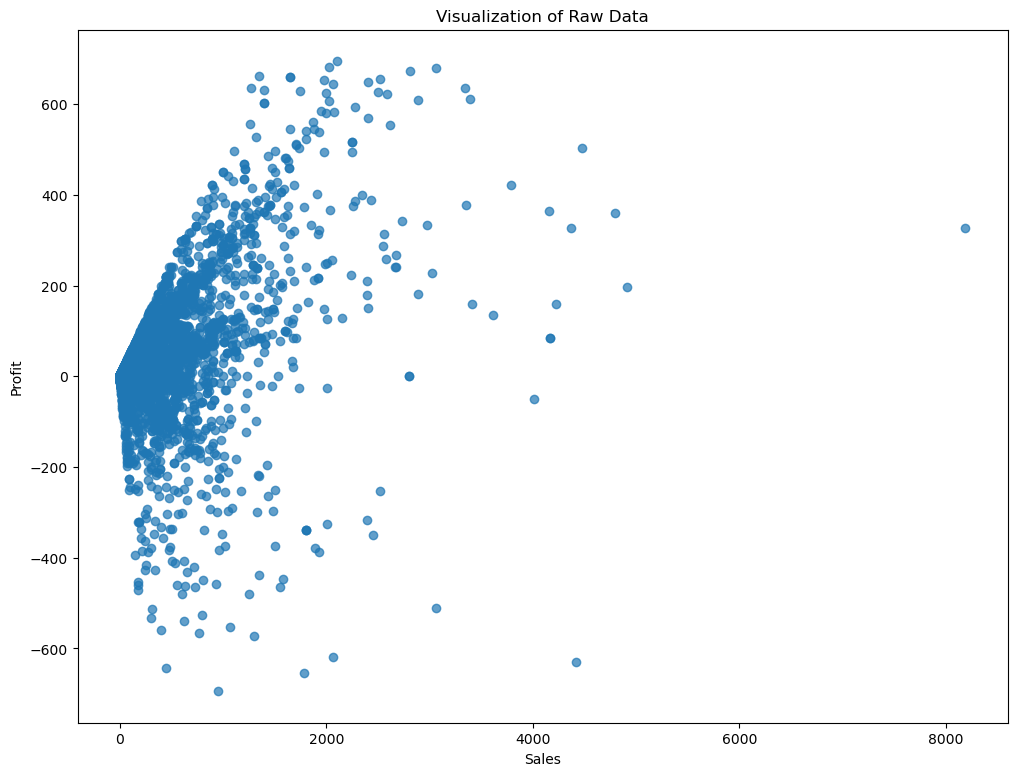

In [21]:
# I will create an intial plot of data, as i jave +10,000 data points, I'll scatter across Sales and Profit, located in position 17 and 20.

plt.figure(figsize=(12, 9))
plt.scatter(df_super['Sales'], df_super['Profit'], alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Visualization of Raw Data')
plt.show()

In [22]:
plt.close()

##### The graph represents all points in our current data set, which our K-means algorithm will aim to segment.
- There seems to be a positive correlation between sales and profit for most points as expected ie the higher sales generally lead to the higher profits.
- There are a few outliers with high sales but very low or negative profit and similarly there are points with low sales but disproportionately high profit.
- The majority of the data points are concentrated in the lower ranges of both sales and profit indicating most transactions are smaller in scale.
- For lower sales there is a widespread of profit.
- The relationship between sales and profit may not be perfectly linear especially at the extremes, hence **Preprocessing** might reveal clusters that explain this behaviour.

### 03 Data Preprocessing

##### Our segmentation model will be based on similarities and differences between individuals on the features that characterize them.
##### I want a tree all the features equally, hence I want to transform in a way that makes their values fall within the same numerical range
##### Thus, the differences between their values will be comparable so I will use **Standardisation**.

In [26]:
# Standardisation

scaler = StandardScaler()
seg_std_super = scaler.fit_transform(df_super_num)

# Convert back to a DataFrame for easier interpretation
df_super_standardized = pd.DataFrame(seg_std_super, columns=df_super_num.columns)

In [27]:
# Display the standardized data

print(df_super_standardized.head())

      Sales  Quantity  Discount    Profit  Profit Margin (%)
0 -0.471128 -0.797658  0.221226 -0.197585           0.463934
1 -0.506000 -0.797658  3.149899 -0.324097          -3.635353
2 -0.483743 -0.347222  0.221226 -0.212253           0.518229
3  0.221138 -0.347222  0.221226 -1.003410          -0.784856
4 -0.462782 -0.347222  0.221226 -0.205263           0.273901


### 04 Principle Components Analysis (PCA)

In [29]:
# Standardise data using PCA, to help reduce the number of features in my data set

pca = PCA()
pca.fit(df_super_standardized)

PCA()

In [30]:
# Check the ratio: the attribute shows how much variance is explained by each of the 5 Individual components

print(pca.explained_variance_ratio_)

[0.43000825 0.28536607 0.16621684 0.09149759 0.02691125]


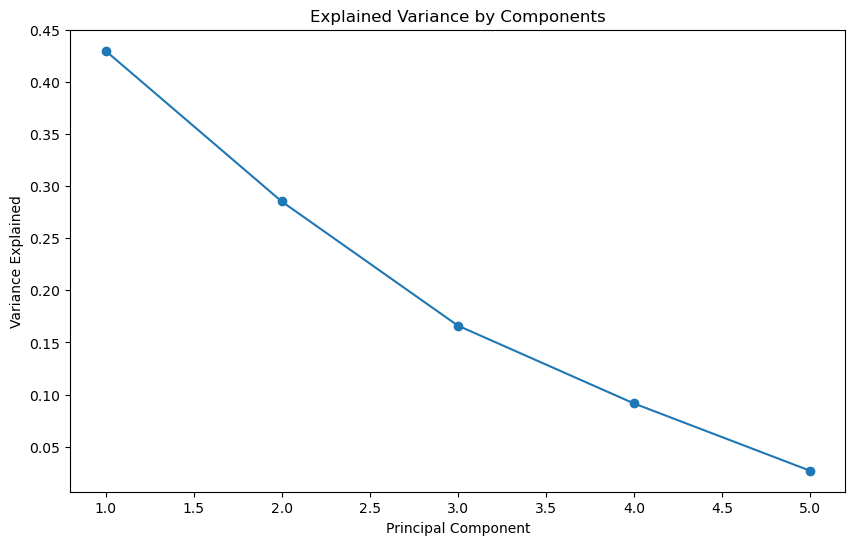

In [31]:
# Create a plot to allow me to decide how many features we’d like to keep based on the cumulative variance plot.

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Components')
plt.show()

In [32]:
# Calculate The cumulative variance to help identify how many components I would need when using 80% of variance as a rule of thumb

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)

[0.43000825 0.71537432 0.88159116 0.97308875 1.        ]


In [33]:
# Use a threshold to identify the number of components that explain 80% of the variance:

n_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.8) + 1
print(f"Number of components to explain 80% variance: {n_components}")

Number of components to explain 80% variance: 3


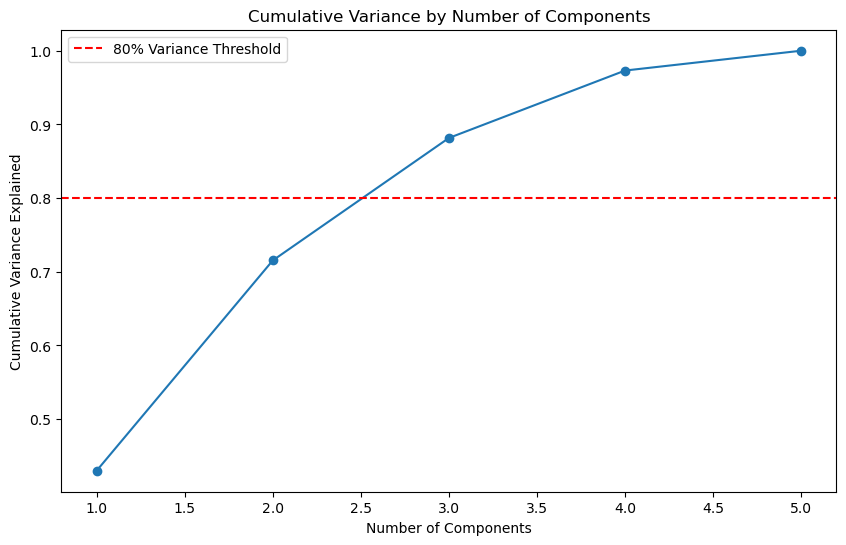

In [34]:
# I want to plot the cumulative variance to help me visualise the cumulative variance to decide interactively

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance by Number of Components')
plt.legend()
plt.show()

#### I think from this data it's fair and reasonable to say that **3** components are sufficient to explain 80% of the variance in my data set based on the cumulative variance plot and the threshold used.
- By reducing the dataset to 3 principal components, I retain most of the variance while discarding less meaningful components, which helps in downstream tasks like clustering or visualization.

In [36]:
# Perform PCA with the 3 components

pca = PCA(n_components = 3)

In [37]:
# Fit The model to my data set with the 3 components

pca.fit(df_super_standardized)

PCA(n_components=3)

In [38]:
reduced_data = pca.transform(df_super_standardized)  # This should work

In [39]:
# I need only the calculated resulting components scores for the elements in our data set

df_super_pca = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

In [40]:
# Display the first few rows of the reduced data

print(df_super_pca.head())

        PC1       PC2       PC3
0  0.151290 -0.869795 -0.392644
1  4.401806  1.281171 -1.299230
2  0.078928 -0.669481  0.005407
3  1.056280 -0.059850 -0.146741
4  0.215144 -0.573294 -0.042041


In [41]:
# Confirm that df_super_pca contains only numeric data

print(df_super_pca.info())  # Check column types and non-null values
print(df_super_pca.isnull().sum())  # Ensure there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10068 entries, 0 to 10067
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     10068 non-null  float64
 1   PC2     10068 non-null  float64
 2   PC3     10068 non-null  float64
dtypes: float64(3)
memory usage: 236.1 KB
None
PC1    0
PC2    0
PC3    0
dtype: int64


In [42]:
# Remove exisiting Cluster column to ensure assigning the results to the K-model

df_super_pca = df_super_pca.drop(columns=['Cluster'], errors='ignore')

### 05 Combine PCA and K-means Clustering (Elbow Method)

##### Now I need to combine the PCA and K means segment my data where I use the reduced data scores obtained by the PCA for the fit
- The K in ‘K-means’ stands for the number of clusters we’re trying to identify, via a cluster seed (a starting cluster centroid)
- In any case, it turns out that we ourselves need to determine the number of clusters in a K-means algorithm

In [45]:
# K-means clustering using the transformed data with PCA, upto 10 clusters

wcss_values = [] # 'Within-Cluster Sum of Squares', 
# measures the total variance within each cluster by calculating the sum of squared distances between each data point and the centroid of its cluster.

# Calculate WCSS ('Within-Cluster Sum of Squares') for different cluster sizes
max_clusters = 10
wcss_values = []
for num_clusters in range(1, max_clusters + 1): # parameterizing, allowing the range of clusters to be defined dynamically (more flexiable)
    kmeans = KMeans(
        n_clusters=num_clusters,
        init='k-means++',
        random_state=42 # random amount (placeholder)
    )
    kmeans.fit(df_super_pca)  # Fit K-means to PCA-transformed data
    wcss_values.append(kmeans.inertia_)

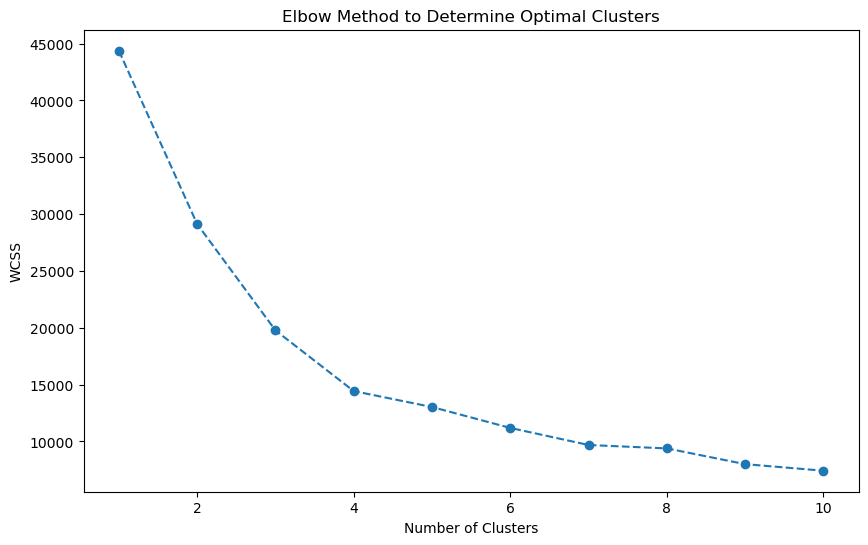

In [46]:
# Plot the WCSS vs. Number of Clusters to identify the "elbow"

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

#### From this graph, I can determine the number of clusters I’d like to keep. 
- Looking at the kink in the elbow it comes up the four clusters mark so I'll be keeping the four cluster solutions

In [48]:
# I have chosen 4 clusters, so will run K-means with number of clusters equals 4.

kmeans_super = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [49]:
# Fit the data with the k-means pca model

kmeans_super.fit(df_super_pca)

KMeans(n_clusters=4, random_state=42)

In [50]:
# Inspect the cluster labels

print(set(kmeans_super.labels_))  # Should return {0, 1, 2, 3}
print(len(set(kmeans_super.labels_)))  # Should return 4

{0, 1, 2, 3}
4


In [51]:
# Assign new cluster labels

df_super_pca['Cluster'] = kmeans_super.labels_

In [52]:
df_super_pca['Cluster'].value_counts()

Cluster
1    6070
0    2551
2    1013
3     434
Name: count, dtype: int64

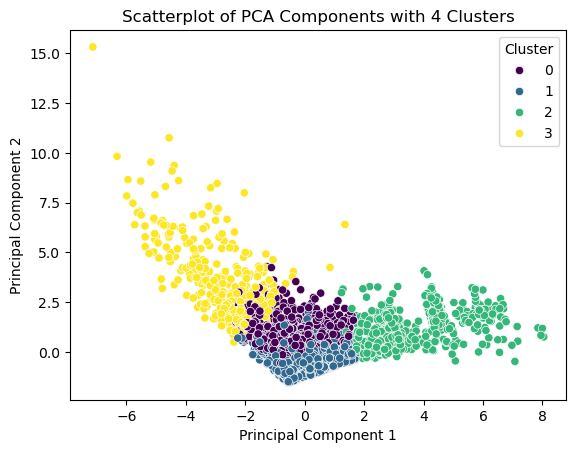

In [154]:
# Visually confirm the clustering into 4 clusters.

# Create a scatterplot of the PCA components, colored by cluster
scat1 = sns.scatterplot(
    data=df_super_pca,
    x='PC1', 
    y='PC2', 
    hue=kmeans_super.labels_, 
    palette='viridis'
)

# Add labels and a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of PCA Components with 4 Clusters')
plt.legend(title='Cluster', loc='best')
plt.show()

In [156]:
# Export scatterplot

scat1.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat1_raw_data.png'))

In [54]:
plt.close()

##### The scatterplot confirms that the 4 clusters generated by K-Means on the PCA-transformed data are well-separated, providing a strong foundation for analysis.

### 06 Analyze the Results of PCA and K-Means Clustering

##### It is recommended that a new data frame that combines the original data, the PCA components, and the cluster labels is created (ref https://365datascience.com/tutorials/python-tutorials/pca-k-means/):
- I can view how the original features relate to the principal components and assigned clusters.
- I can se the new DataFrame to create plots or dashboards that include the original data alongside the clustering results.
- By combining the results into a single DataFrame, you avoid managing multiple separate objects (e.g., PCA components, cluster labels, original features).
- It simplifies the process of exploring the clusters by retaining the original features for context.

In [58]:
# Verify the shape of the Cluster labels

print(pd.DataFrame({'Cluster': kmeans_super.labels_}).shape)

(10068, 1)


In [59]:
print(kmeans_super.n_clusters)  # Should return 4

4


In [60]:
# Double-check that kmeans_super.labels_ is being converted into a proper pd.Series before concatenation:

cluster_labels = pd.Series(kmeans_super.labels_, name='Cluster')
print(cluster_labels.shape) 

(10068,)


In [61]:
# Check all DataFrames and the Cluster Series being concatenated have aligned indices

print(df_super.reset_index(drop=True).shape)  # Shape of original data
print(df_super_pca.reset_index(drop=True).shape)  # Shape of PCA components
print(cluster_labels.shape)  # Shape of cluster labels

(10068, 28)
(10068, 4)
(10068,)


In [62]:
# Each dataset must have the same number of rows.

print(df_super.shape[0])       # Number of rows in the original data
print(df_super_pca.shape[0])   # Number of rows in the PCA data
print(cluster_labels.shape[0]) # Number of rows in the cluster labels

10068
10068
10068


In [63]:
# Drop any existing "Cluster" column from df_super and df_super_pca

df_super = df_super.drop(columns=['Cluster'], errors='ignore')
df_super_pca = df_super_pca.drop(columns=['Cluster'], errors='ignore')

In [64]:
# Combine the **original data**, PCA components, and cluster labels

df_super_combined = pd.concat(
    [df_super.reset_index(drop=True), 
     df_super_pca.reset_index(drop=True), 
     cluster_labels.reset_index(drop=True)], 
    axis=1
)

In [65]:
# Check the structure of the combined DataFrame

print(df_super_combined.shape) 
print(df_super_combined.head()) 

(10068, 32)
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  US-2021-103800  2021-01-03  07/01/2021  Standard Class    DP-13000   
1       2  US-2021-112326  2021-01-04  08/01/2021  Standard Class    PO-19195   
2       3  US-2021-112326  2021-01-04  08/01/2021  Standard Class    PO-19195   
3       4  US-2021-112326  2021-01-04  08/01/2021  Standard Class    PO-19195   
4       5  US-2021-141817  2021-01-05  12/01/2021  Standard Class    MB-18085   

   Customer Name      Segment Country/Region          City  ... Returned  \
0  Darren Powers     Consumer  United States       Houston  ...        0   
1  Phillina Ober  Home Office  United States    Naperville  ...        0   
2  Phillina Ober  Home Office  United States    Naperville  ...        0   
3  Phillina Ober  Home Office  United States    Naperville  ...        0   
4     Mick Brown     Consumer  United States  Philadelphia  ...        0   

  Duplicate_Flag Profit Margin (%)  Year Qua

### 07 Visualize Clusters by Components

In [67]:
# Use categorical variables to analyze the clusters.

# Analyze the distribution of the 'Segment' categorical variable in each cluster
print(df_super_combined.groupby('Cluster')['Segment'].value_counts())

Cluster  Segment    
0        Consumer       1305
         Corporate       784
         Home Office     462
1        Consumer       3176
         Corporate      1809
         Home Office    1085
2        Consumer        529
         Corporate       315
         Home Office     169
3        Consumer        212
         Corporate       144
         Home Office      78
Name: count, dtype: int64


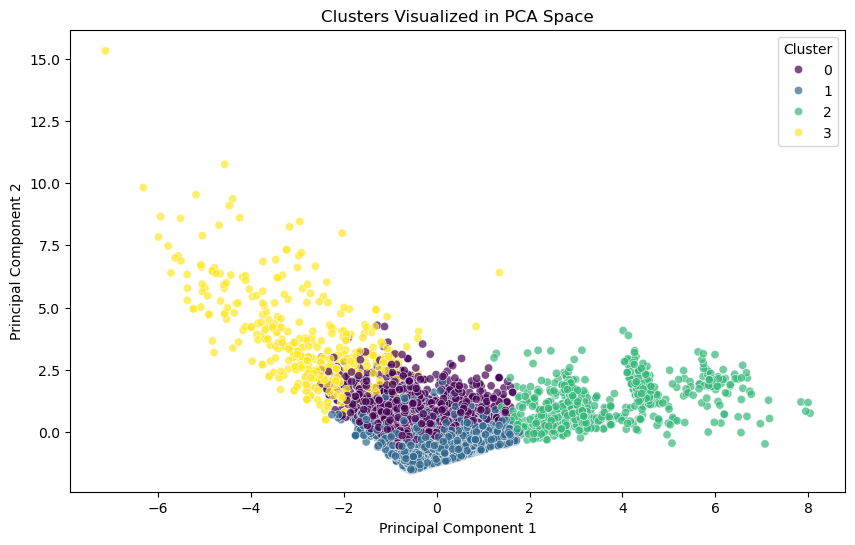

In [158]:
# Create the scatterplot
plt.figure(figsize=(10, 6))
scat2 = sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster',  # Hue maps clusters to colors
    palette='viridis',  # Color palette
    data=df_super_combined,  # DataFrame containing the data
    alpha=0.7  # Transparency for better visibility
)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualized in PCA Space')
plt.legend(title='Cluster')  # Add legend for clusters
plt.show()

In [160]:
# Export scatterplot

scat2.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat2_clusters_pca.png'))

In [70]:
plt.close()

#### Insight to initally overview scatterplot:
- The clusters occupy distinct regions, suggesting that the underlying features provide meaningful differentiation between the groups.
- **Cluster 0 (Purple)**: Concentrated in a compact region near the origin, suggesting a tightly grouped set of observations with similar PCA characteristics.
- **Cluster 1 (Green)**: Spread across the right-hand side, showing greater variability within this cluster compared to others.
- **Cluster 2 (Cyan)**: Spread out below and slightly overlapping with other clusters, which might indicate some shared characteristics with neighboring clusters.
- **Cluster 3 (Yellow)**: Concentrated on the left-hand side with relatively less overlap, suggesting distinct characteristics from the other clusters.

In [72]:
df_super_combined['Cluster'].value_counts()

Cluster
1    6070
0    2551
2    1013
3     434
Name: count, dtype: int64

In [73]:
print(kmeans.labels_)  # Check the unique values
print(df_super_combined['Cluster'].unique())  # Check the unique values in the Cluster column


[5 8 5 ... 5 7 5]
[1 2 3 0]


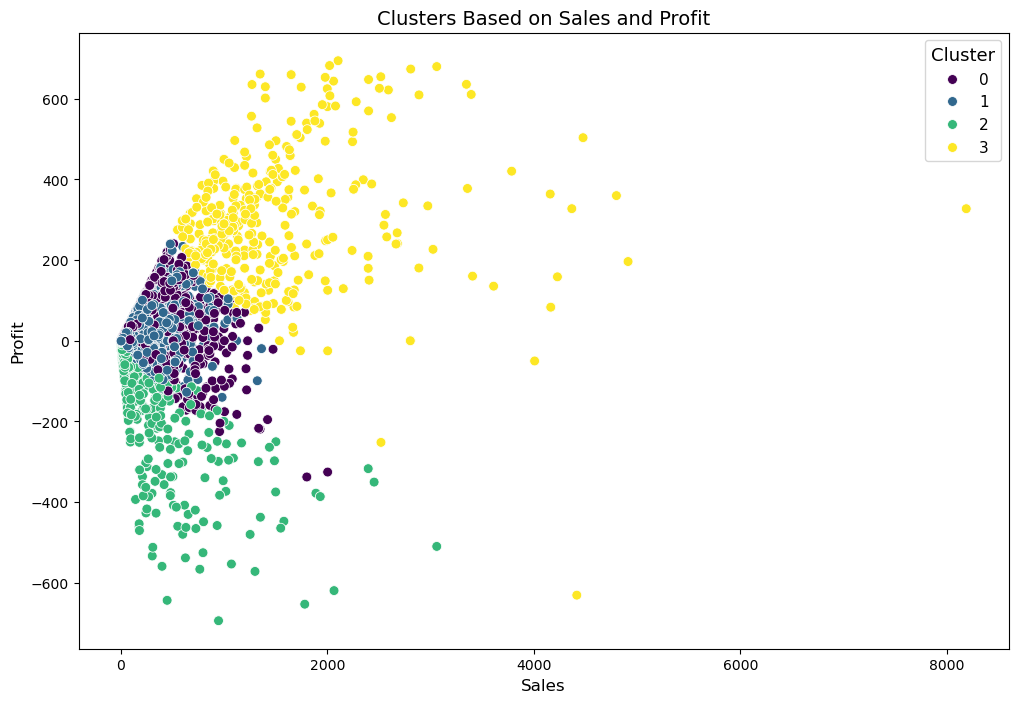

In [164]:
# Plot the clusters for the "Sales" and "Profit" variables.

# Increase the figure size
plt.figure(figsize=(12, 8))  # Width=14 inches, Height=10 inches

# Create the scatterplot
scat3 = sns.scatterplot(
    x='Sales', 
    y='Profit', 
    hue='Cluster',  # Use the Cluster column from df_super_combined
    data=df_super_combined, 
    palette='viridis', 
    s=50  # Adjust marker size as needed
)

# Add titles and labels
plt.title('Clusters Based on Sales and Profit', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Add legend and customize
plt.legend(title='Cluster', fontsize=11, title_fontsize=13)
plt.show()

#### General Observations:
- Cluster 0 (purple) is concentrated around lower Sales values and exhibits minimal or slightly negative Profit, representing modest transactions with low performance.
- Cluster 1 (blue) shows more spread in Sales and slightly improved Profit compared to Cluster 1, serving as a transition between unprofitable and profitable groups.
- Cluster 2 (green) spans low to medium Sales values and mostly negative Profit, indicating unprofitable transactions (requires understanding impact of discounts or low-margin products).
- Cluster 3 (yellow) dominates the higher Sales and positive Profit range, identifying high-value transactions or customers likely purchasing in bulk or high-margin products.

#### Key Insights:
- Clusters 0 (purple) and 2 (green) represents areas of concern due to low profitability, with Cluster 0 showing negative profit despite moderate sales, needed further investigation.
- Cluster 1 (blue) presents an opportunity to transition mid-range customers into the profitable Cluster 3, which drives the majority of revenue and profit.
- Cluster 3 is the most valuable group, highlighting high-performing customers or transactions that should be prioritized for engagement through loyalty programs or targeted offers.

In [166]:
# Export scatterplot

scat3.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat3_sales_profit.png'))

In [162]:
plt.close()

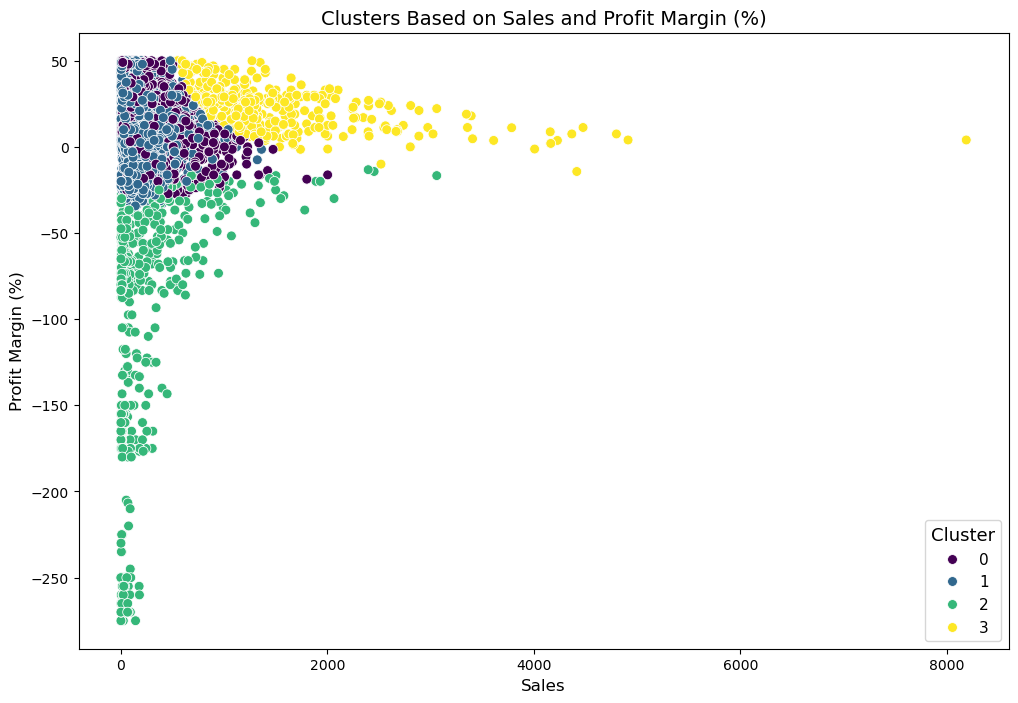

In [168]:
# Plot the clusters for the "Sales" and "Profit Margin (%)" variables.

# Increase the figure size
plt.figure(figsize=(12, 8))  # Width=14 inches, Height=10 inches

# Create the scatterplot
scat4 = sns.scatterplot(
    x='Sales', 
    y='Profit Margin (%)', 
    hue='Cluster',  # Use the Cluster column from df_super_combined
    data=df_super_combined, 
    palette='viridis', 
    s=50  # Adjust marker size as needed
)

# Add titles and labels
plt.title('Clusters Based on Sales and Profit Margin (%)', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)

# Add legend and customize
plt.legend(title='Cluster', fontsize=11, title_fontsize=13)
plt.show()

#### General Observations:
- Cluster 0 (purple) is clustered around low Sales values with a range of profit margins close to 0 or slightly positive, indicating low-value but relatively stable transactions.
- Cluster 1 (blue) shows a wider spread in Sales but predominantly negative profit margins, representing unprofitable transactions across a broader range of sales values.
- Cluster 2 (green) spans low to medium Sales values and is characterized by predominantly negative profit margins, with some transactions experiencing substantial losses.
- Cluster 3 (yellow) is concentrated at higher Sales values and positive profit margins, signifying high-value and high-profit transactions, neding investigation if this is associated with premium products or bulk purchases.

#### Key Insights:
- Cluster 3 represents the most profitable group and should be prioritized for continued engagement and growth through loyalty programs or targeted offers. 
- Clusters 1 and 2 are areas of concern due to their significant negative profit margins, suggesting a need to investigate causes such as high discount rates, low-margin products, or operational inefficiencies.
- Cluster 0 offers stability with its low but consistent profit margins and could benefit from strategies to increase sales while maintaining profitability.

There could be a need to understand inefficiencies in Clusters 1 and 2 and leveraging the strengths of Cluster 3, to gain insight on the businesses profitability.

In [170]:
# Export scatterplot

scat4.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat4_sales_margin.png'))

In [ ]:
plt.close()

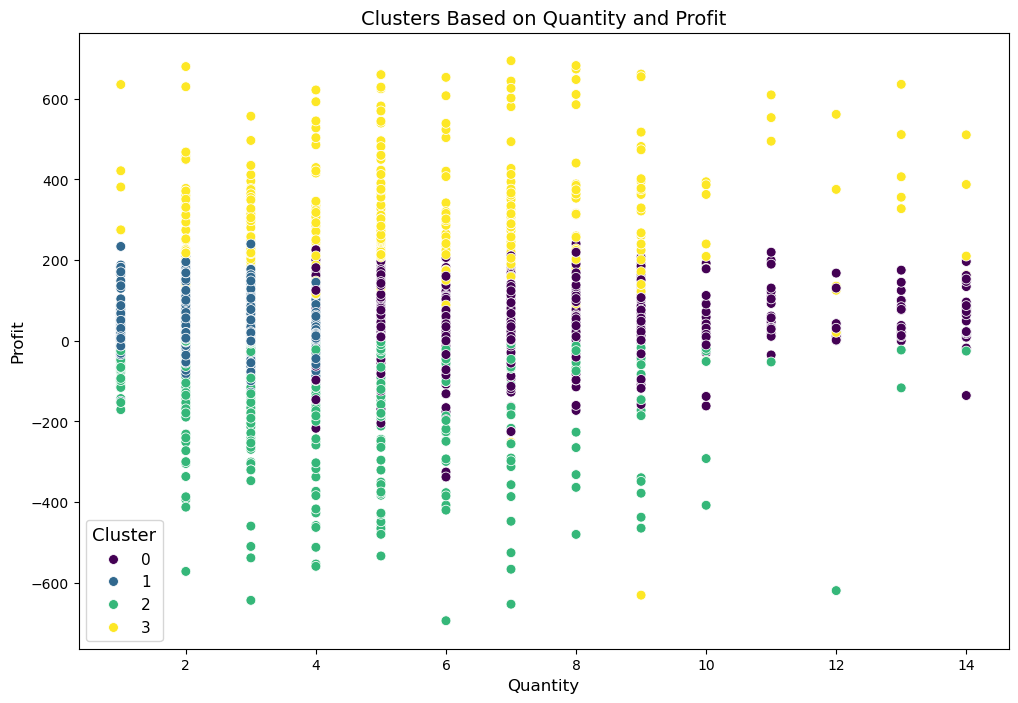

In [176]:
# Plot the clusters for the "Quantity" and "Profit" variables.

# Increase the figure size
plt.figure(figsize=(12, 8))  # Width=14 inches, Height=10 inches

# Create the scatterplot
scat5 = sns.scatterplot(
    x='Quantity', 
    y='Profit', 
    hue='Cluster',  # Use the Cluster column from df_super_combined
    data=df_super_combined, 
    palette='viridis', 
    s=50  # Adjust marker size as needed
)

# Add titles and labels
plt.title('Clusters Based on Quantity and Profit', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Add legend and customize
plt.legend(title='Cluster', fontsize=11, title_fontsize=13)
plt.show()

#### General Observations:
- Cluster 0 (purple) is primarily concentrated at lower Quantity values with a range of profits around zero or slightly negative, indicating small orders with limited profitability.
- Cluster 1 (blue) spans a wider range of quantities but is predominantly associated with negative profits, suggesting unprofitable transactions across varying order sizes.
- Cluster 2 (green) exhibits similar patterns to Cluster 1, with mostly negative profits, though it appears more dispersed across higher Quantity values.
- Cluster 3 (yellow) dominates the higher profit range, even at varying Quantity levels, representing high-value transactions that contribute significantly to overall profitability.

#### Key Insights:
- Cluster 3 stands out as the most profitable group, even across a range of Quantity values, highlighting its importance in sustaining profitability.
- Clusters 1 and 2 represent areas of concern, as they include unprofitable transactions even for larger orders, potentially due to high discounts or low-margin products. Cluster 0, though small in scale, exhibits stable but minimal profitability and could be targeted for strategies to increase order sizes or improve product mix.

Anaylsing the inefficiencies in Clusters 1 and 2 and capitalizing on the high-value customers in Cluster 3 can drive overall growth and profitability.

In [178]:
# Export scatterplot

scat5.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat5_quantity_profit.png'))

In [172]:
plt.close()

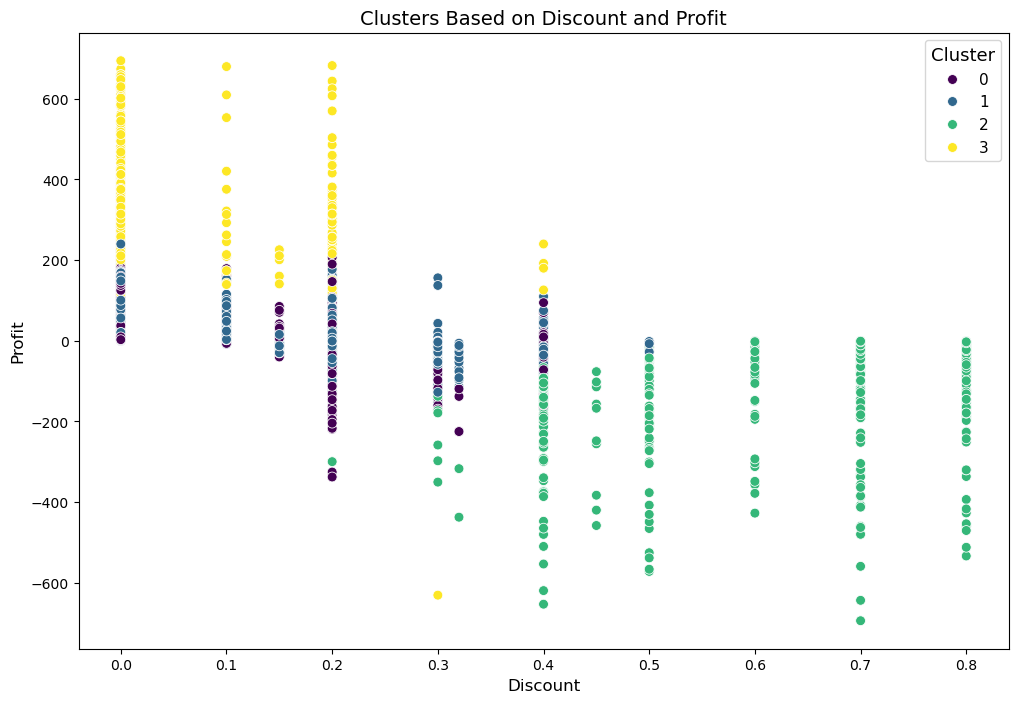

In [180]:
# Plot the clusters for the "Discount" and "Profit" variables.

# Increase the figure size
plt.figure(figsize=(12, 8))  # Width=14 inches, Height=10 inches

# Create the scatterplot
scat6 = sns.scatterplot(
    x='Discount', 
    y='Profit', 
    hue='Cluster',  # Use the Cluster column from df_super_combined
    data=df_super_combined, 
    palette='viridis', 
    s=50  # Adjust marker size as needed
)

# Add titles and labels
plt.title('Clusters Based on Discount and Profit', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)

# Add legend and customize
plt.legend(title='Cluster', fontsize=11, title_fontsize=13)
plt.show()

#### General Observations:
- Cluster 0 (purple) is concentrated at lower discount levels (0-0.2) with profits hovering around zero or slightly negative, indicating limited profitability for transactions with minimal discounts.
- Cluster 1 (blue) spans slightly higher discount levels (0.1-0.4) but is characterized by predominantly negative profits, suggesting that even moderate discounts lead to unprofitable transactions.
- Cluster 2 (green) is distributed across the widest range of discount levels (0.2-0.8) and shows significant negative profits, indicating that higher discounts erode profitability further.
- Cluster 3 (yellow) consistently exhibits high positive profits at lower discount levels (0-0.3), highlighting its status as the most profitable group.

#### Key Insights:
- Cluster 3 demonstrates that profitability is strongest when discounts are kept low, reinforcing the importance of maintaining premium pricing for high-value customers. Clusters 1 and 2 reveal a troubling pattern where increasing discount levels lead to unprofitable transactions, particularly in
- Cluster 2, where high discounts (above 0.4) are strongly associated with substantial losses.
- Cluster 0, though stable, operates at minimal profit and suggests an opportunity to optimize pricing or increase transaction sizes.

To understand profitability further, should focus on reviewing excessive discounts in Clusters 1 and 2.

In [184]:
# Export scatterplot

scat6.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat6_discount_profit.png'))

In [182]:
plt.close()

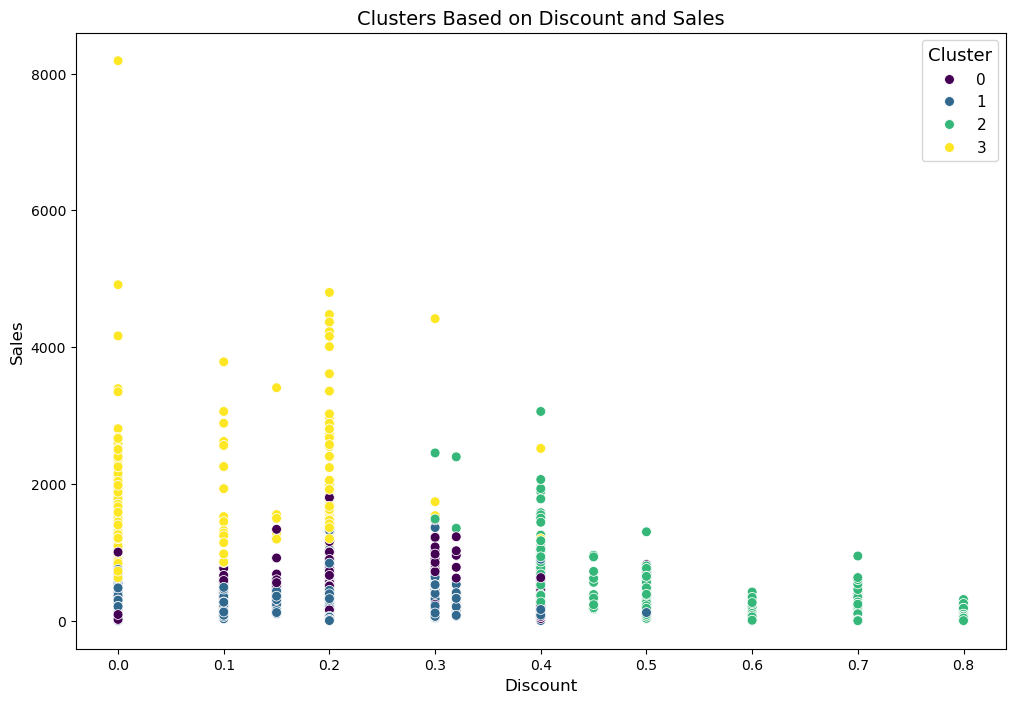

In [188]:
# Plot the clusters for the "Discount" and "Sales" variables.

# Increase the figure size
plt.figure(figsize=(12, 8))  # Width=14 inches, Height=10 inches

# Create the scatterplot
scat7 = sns.scatterplot(
    x='Discount', 
    y='Sales', 
    hue='Cluster',  # Use the Cluster column from df_super_combined
    data=df_super_combined, 
    palette='viridis', 
    s=50  # Adjust marker size as needed
)

# Add titles and labels
plt.title('Clusters Based on Discount and Sales', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Add legend and customize
plt.legend(title='Cluster', fontsize=11, title_fontsize=13)
plt.show()

#### General Observations:
- Cluster 0 (purple) is concentrated at lower discount levels (0-0.2) and generally corresponds to smaller Sales values, indicating low transaction volumes and minimal discounts.
- Cluster 1 (blue) is spread across slightly higher discount levels (0.1-0.4) but still corresponds to low Sales, suggesting unremarkable transactions despite moderate discounts.
- Cluster 2 (green) covers a wide range of discount levels (0.2-0.8) but remains associated with relatively low Sales, indicating that higher discounts are not driving significant increases in transaction volume.
- Cluster 3 (yellow) is predominantly found at lower discount levels (0-0.3) but corresponds to the highest Sales values, with some transactions reaching up to 8000, signifying high-value transactions that benefit from minimal discounts.

#### Key Insights:
- Cluster 3 demonstrates that high Sales are achieved at low discount levels, reinforcing the importance of maintaining a low-discount strategy for high-value customers.
- Clusters 1 and 2 show that increasing discounts does not translate into higher Sales and may instead contribute to erosion of revenue potential.
- Cluster 0, while stable, reflects small transactions with limited sales volumes, suggesting an opportunity to grow revenue by encouraging higher-value purchases.

To understand overall profitability and sales, efforts should focus on analysis of the low-discount, high-sales strategy of Cluster 3.

In [190]:
# Export scatterplot

scat7.figure.savefig(os.path.join(path, '01 2025 Advanced Analytics Project', 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', '6.5_scat7_discount_sales.png'))

In [186]:
plt.close()

### 08 Finding and Conclusions

In [85]:
# Beyond these initial observations, the best descriptive analysis you can conduct with your clusters is to check each of their individual statistics.

df_super_combined.groupby('Cluster').agg({'Profit':['mean', 'median'], 
                         'Sales':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Quantity':['mean', 'median'],
                            'Profit Margin (%)':['mean', 'median']})

Profit                 Sales            Discount         \
               mean   median         mean    median      mean median   
Cluster                                                                
0         29.325700   17.690   204.489451    88.040  0.095900    0.0   
1         16.292089    7.260   108.543937    40.480  0.099293    0.0   
2        -68.015558  -15.080   124.452063    16.390  0.670573    0.7   
3        287.255207  272.105  1417.281590  1215.385  0.070622    0.0   

         Quantity        Profit Margin (%)             
             mean median              mean     median  
Cluster                                                
0        6.404547    6.0         26.055600  30.000000  
1        2.520758    3.0         24.777469  29.000000  
2        3.859822    3.0       -101.199201 -76.666667  
3        5.566820    5.0         23.902521  26.000000

#### Judging by these statistics, you can see some facts:

- **Cluster 0 (purple)**
This cluster has the second-highest mean and median profit margins (mean: 26.06%, median: 30.00%), suggesting profitability despite modest sales.
The mean sales value (204.48) and median sales value (88.04) indicate low to moderate transaction sizes.

- **Cluster 1 (blue)**
Cluster 1 shows a moderate profit margin (mean: 24.78%, median: 29.00%), slightly below Cluster 0.
The sales values are lower than Cluster 0, with a mean of 108.54 and a median of 40.48, indicating smaller transaction sizes.

- **Cluster 2 (green)**
This cluster has the most negative profit margin (mean: -101.20%, median: -76.67%), highlighting unprofitable transactions with heavy losses.
Despite a higher mean sales value (124.45) compared to Cluster 1, this cluster’s discounts (mean: 67.05%) are the highest, significantly eroding profitability.

- **Cluster 3 (yellow)**
Cluster 3 generates the highest mean profit (287.26) and median profit (272.11), with the largest sales values (mean: 1417.28, median: 1215.38).
Discounts in this cluster are minimal (mean: 7.06%), supporting its high profitability and making it the most valuable group.

#### Key Insights:
- **Cluster 3 (yellow)** is the most profitable group due to high sales, low discounts, and strong profit margins, making it the primary focus for understanding how this group maintains and grows revenue.
- **Cluster 2 (green)** is highly unprofitable, with the largest discounts (67.05% mean) eroding profitability despite moderate sales values. This cluster requires attention to understand where these discounts are being applied, both on which products and which specific stores.
- **Cluster 0 (purple)** is a profitable but low-value segment, with consistent margins (mean: 26.06%) and modest transaction sizes, indicating an opportunity to understand how to increase average sales per transaction.
- **Cluster 1 (blue)** operates with smaller sales and slightly lower profitability than Cluster 0, suggesting the need to understand what type of purchases are being made and then how to grow sales while maintaining its moderate profit margins.
- The statistics illustrates 'Discounts' are the most critical factor driving profitability differences among clusters, with minimal discounts correlating strongly with high profitability (e.g., Cluster 3) and heavy discounts leading to losses (e.g., Cluster 2).

#### Possible Customer Groups:

- **Cluster 0 (Purple)**: "Consistent Low-Value Buyers"
Customers with low transaction sizes and stable, modest profit margins.
**"Stable Spenders"**
  
- **Cluster 1 (Blue)**: "Small Unprofitable Transactions"
Customers making small purchases with moderate discounts leading to reduced profitability.
**"Bargain Hunters"**

- **Cluster 2 (Green)**: "High Discount, Heavy Losses"
Transactions characterized by large discounts, resulting in significant negative profits.
**"Discount-Driven only Spenders"**

- **Cluster 3 (Yellow)**: "High-Value High-Profit Customers"
Customers making large purchases with minimal discounts, driving the majority of profit.
**"Premium Buyers"**

#### Limitations of Data (to be considered)
- Some clusters (e.g., unprofitable or heavily discounted transactions) might be underrepresented in the data, potentially leading to biased cluster formation. This could affect the interpretability and reliability of the clustering results.
- Clustering does not account for temporal trends (e.g., seasonal variations, quarterly performance). This could limit the actionable insights, as the analysis treats all data points as equally relevant, potentially overlooking time-based dependencies.

### 09 Future Steps

#### Next steps of an analytics pipeline:

- **Operational Efficiency Improvements**

Look at recommendations regards the focus of resources on retaining and expanding relationships with Cluster 3 (yellow - "Premium Buyers"), such as what percentage of these customers are 'Corperate', Consumer, and 'Home Office' customers to understand potential targeted marketing strategies.

- **Pricing and Discount Optimization**

Analyze the behavior of Cluster 2 (green - "Discount-Driven Losers") to identify 'where' excessive discounts are being applied and understand this discount to recommend how to reduce losses. Insights can also guide dynamic pricing models to balance sales growth and profitability.

- **Customer Retention and Upselling**

Leverage insights about Cluster 0 (purple - "Stable Spenders") to undertand 'what' they are purchasing, to allow recommendations on how to encourage larger purchases or cross-sell opportunities, turning them into higher-value customers like those in Cluster 3 (yellow - "Premium Buyers").

- **Product Portfolio Refinement**

Evaluate the products purchased by each cluster to identify low-performing items heavily bought by Cluster 2 (green - "Discount-Driven Losers"). This can inform decisions to discontinue unprofitable products or improve their cost structures.